# imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn(sckit - learn) 패키지의 neighbors 모듈에서 KNeighborsClassifier 클래스를 import
from sklearn.neighbors import KNeighborsClassifier

#데이터준비

In [ ]:
# 생선의 품종(어종)과 생선의 특성들(길이, 무게, 두께, ...)
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 탐색(EDA)

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
# 카테고리 변수(컬럼)의 빈도수
fish.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [ ]:
# 연속형 변수들의 기술 통계량
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


## 어종을 제외한 5개 변수의 분포를 시각화 - 히스토그램

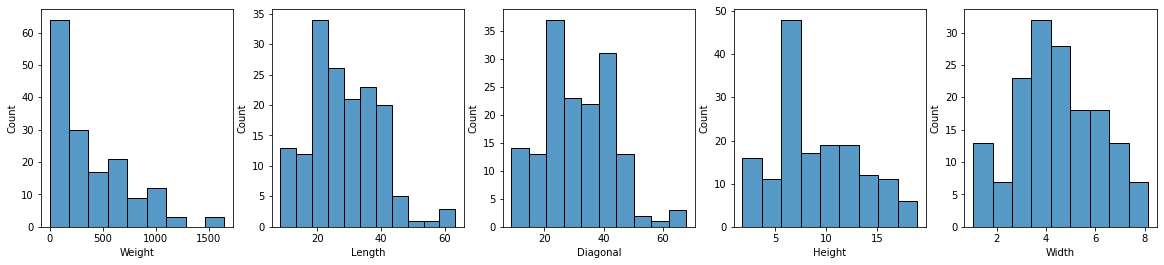

In [ ]:
#연속형 변수 시각화 = 1. 박스플롯 , 2. 히스토그램 
fig,ax = plt.subplots(nrows=1, ncols=5, figsize=(20,4))

variables = fish.columns[1:] # 히스토그램을 그릴 변수 이름들(Weight ~ Width)
for i, var in enumerate(variables):
    sns.histplot(x=var, data=fish, ax=ax[i])
# 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴합니다.

plt.show()

## 변수들의 상관관계 시각화 - pairplot

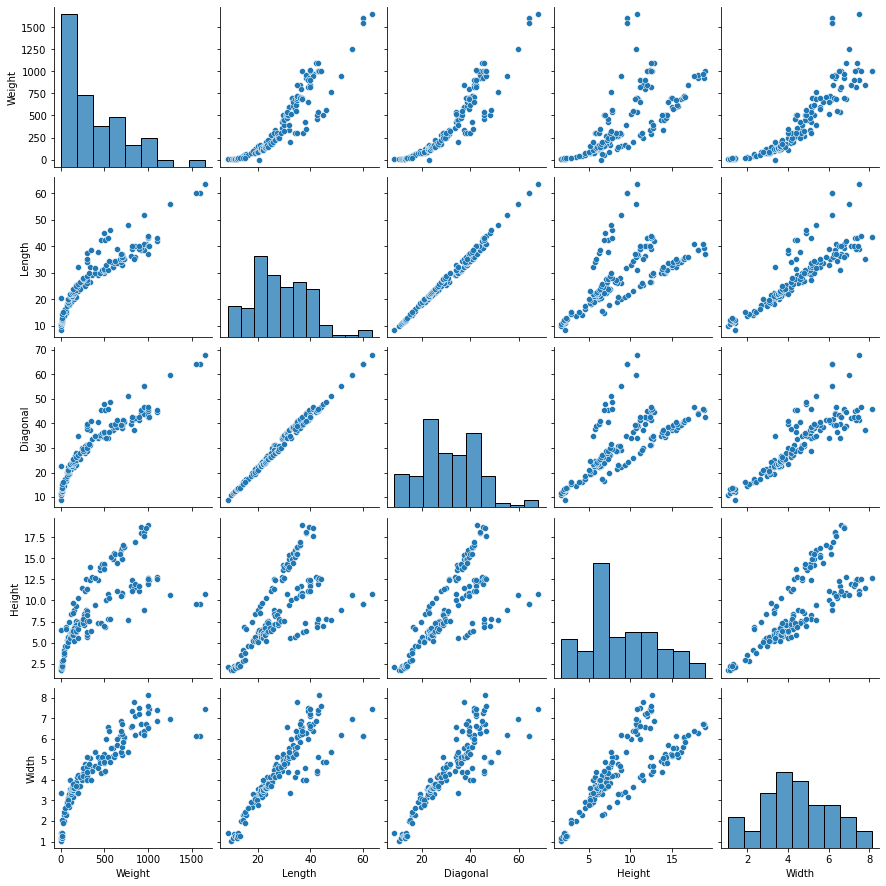

In [ ]:
sns.pairplot(data=fish)
plt.show()

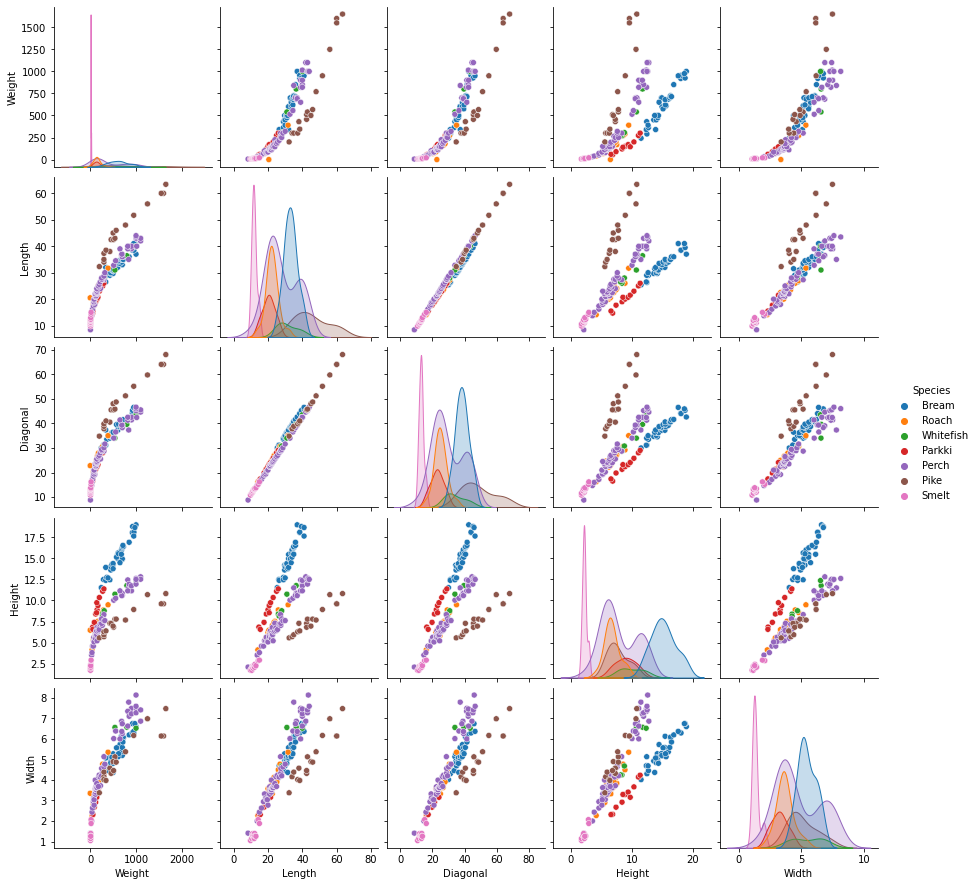

In [ ]:
# 타겟(어종)에 따라서 색깔을 다르게 표현
sns.pairplot(data=fish, hue='Species')
plt.show()

# 머신러닝 (지도학습 = 분류, 회귀 ) - 분류

## 2개 어종 분류 문제
* Bream(도미), Smelt(빙어) 어종 선택 - binary class 분류 문제
* Weight, Length 2개 변수만 고려 - 독립 변수(특성) 2개

In [ ]:
pd.options.display.max_rows = 10
# 디스플레이에 출력되는게 최대 10개로 보여줌

In [ ]:
# 전체 데이터 프레임에서 Bream과 Smelt만 선택
fish.loc[(fish['Species']=='Bream') | (fish['Species']=='Smelt'),
         ['Species','Weight','Length']]

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [ ]:
# (fish['Species']=='Bream') | (fish['Species']=='Smelt')
# or , | , 를 사용할때는 Isin을 사용하게되면 더 편리하다
df = fish.loc[fish['Species'].isin(['Bream','Smelt']),
              ['Species','Weight','Length']]
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [ ]:
df['Species'].value_counts()

Bream    35
Smelt    14
Name: Species, dtype: int64

## weight ~ Length 산점도 (어종별로 색깔 다르게 시각화)

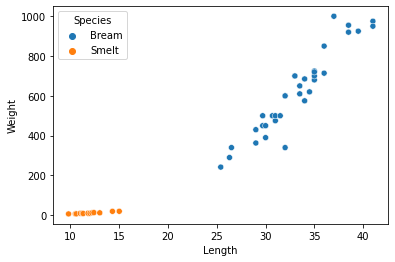

In [ ]:
sns.scatterplot(y='Weight', x='Length', data=df, hue='Species')
plt.show()

In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


* scikit-learn 패키지의 머신 러닝 알고리즘들은 데이터(특성)과 레이블(타겟)을 구분해서 사용함.

* 특성 배열은 2차원 ndarray, 타겟 배열은 1차원 ndarray를 사용함.

In [ ]:
# 특성 배열(Weight, Lenght를 컬럼으로 갖는 2차원 배열)
X = df[['Weight','Length']].values # 특성 행렬(2차원 배열)
#데이터프레임에서 배열로 뽑아내려면 .values
X[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
# 타겟 배열(Species을 저장한 1차원 배열)
y = df['Species'].values
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
y.shape

(49,)

# KNN(K-Nearest Neighbors, K-최근접 이웃)

__KNN__

* k개의 가장 가가운 이웃들의 레이블을 사용해서 예측(분류)를 하는 머신러닝모델.
* KNN 모델(알고리즘)은 별도의 훈련 시간이 필요하지 않음.
* KNN은 예측을 할 때 훈련 데이터와 테스트 데이터 사이의 거리를 계산한 후 가장 가까운 거리 k개를 찾음. 예측 시간이 오래 걸릴 수 있음.
 * 이런 이유로 KNN을 게으른 알고리즘(lazy algorithm)이라고 불림.

In [ ]:
# KNeighborsClassifier 클래스의 객체를 생성
# 파라미터 기본값: k=5 (가장 가까운 이웃 개수), 거리 계산 - Euclidean
knn_clf = KNeighborsClassifier() #생성자 호출 / 거리를 계산해서 가까운 5개를 찾겠다가 디폴트.

In [ ]:
# 모델 훈련(fit - 알고리즘(모델)을 데이터에 맞춤.)
knn_clf.fit(X,y)
# X: 특성 행렬(2차원 배열), y: 타겟 벡터(1차원 배열)

KNeighborsClassifier()

# 모델 평가

* 훈련 데이터를 얼마나 잘 분류하는 지를 평가
 * 훈련 데이터의 예측값을 계산
 * 훈련 레이블과 비교 - 정확도 계산

In [ ]:
# 예측값 -> 평가
train_pred = knn_clf.predict(X)
train_pred # 훈련이 끝난 KNN 모델이 예측한 값들

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [ ]:
y #실제 종속변수 값

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [ ]:
# 정확도 계산 - 실제값(target)과 예측값(train_pred) 비교
np.mean(y== train_pred)
# T= 1 F=0

1.0

## 가상의 테스트 데이터로 예측

In [ ]:
# 가상의 물고기 2마리의 특성: [[600g,30cm],[50g,14cm]]
X_test = np.array([[600, 30], [50, 14]])
X_test

array([[600,  30],
       [ 50,  14]])

In [ ]:
X_test[:,1]

array([30, 14])

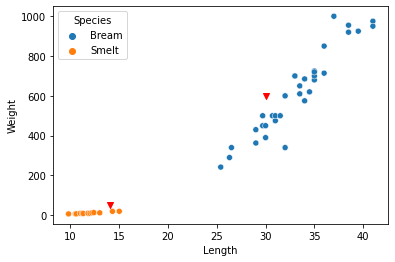

In [ ]:
# 훈련 데이터와 가상의 물고기를 시각화
sns.scatterplot(x='Length',y='Weight',data=df, hue='Species')
plt.scatter(x=X_test[:,1], y=X_test[:,0], color='r', marker='v')
plt.show()

In [ ]:
# 가상의 생선 2마리의 예측값
test_pred = knn_clf.predict(X_test)
test_pred

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
#KNeighborsClassifier의 메서드를 사용한 정확도 계산
# (1) predict(X) 호출해서 예측값을 계산. (2) 예측값과 실젯값 y를 비교해서 정확도를 계산. 
# score 메서드 = 주어진 테스트 데이터와 레이블의 평균 정확도를 반환합니다.
knn_clf.score(X,y)

1.0

In [ ]:
# 가상의 물고기 2마리와 가장 가까운 이웃들 찾기
neigh_ind = knn_clf.kneighbors(X_test, n_neighbors=5, return_distance=False)
neigh_ind

array([[15, 14, 18, 22, 20],
       [48, 47, 45, 46, 44]])

In [ ]:
X[15] # 첫번째 가상의 물고기와 가장 가까운 물고기

array([600.,  32.])

In [ ]:
X[48] #두번째 가상의 물고기와 가장 가까운 물고기

array([19.9, 15. ])

In [ ]:
distances, index = knn_clf.kneighbors(X_test, n_neighbors=5, return_distance=True)

In [ ]:
distances

array([[ 2.        ,  2.        , 10.59481005, 20.5       , 25.3179778 ],
       [30.11660671, 30.30148511, 36.63495598, 37.8132252 , 37.84283287]])

In [ ]:
index

array([[15, 14, 18, 22, 20],
       [48, 47, 45, 46, 44]])

In [ ]:
np.sqrt((600 - 600)**2 + (30-32)**2)

2.0

# 모델 (하이퍼 파라미터) 튜닝

* 머신러닝에서 하이퍼 파라미터란 쉽게 생각해서 사용자의 입력값, 혹은 설정 가능한 옵션이라고 볼 수 있다.

In [ ]:
# k=1인 knn 모델 생성
knn_1 = KNeighborsClassifier(n_neighbors=11)

# 모델 훈련(fit)
knn_1.fit(X,y)

# 훈련 셋에서 예측값 계산
train_pred = knn_1.predict(X)

# 예측값 실젯값 비교 - 평가

# np.mean(y==train_pred)
knn_1.score(X,y)

1.0

* KNN에서 K값을 1~49 까지 변화시키면서 모델 생성, 훈련, 정확도 계산하고 저장.
* K값에 따른 정확도의 변화를 시각화.

In [ ]:
k = []  # 각각의 k값에서 계산한 정확도를 저장할 리스트
for i in range(1,50): 
    knn = KNeighborsClassifier(n_neighbors=i) # 머신 러닝 모델 생성
    knn.fit(X,y) # 모델 훈련(fit)
    train_pred = knn.predict(X) # 훈련 셋에서 예측값 계산
    score = knn.score(X,y) # 훈련 셋에서의 정확도
    k.append(score)
print(k)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


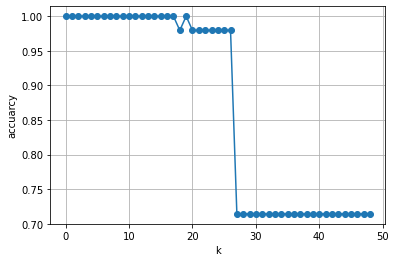

In [ ]:
plt.plot(k, 'o-')
plt.grid()
plt.xlabel('k')
plt.ylabel('accuarcy')
plt.show()

In [ ]:
# np.argmax(array): array에서 (첫번째로 등장하는 ) 최댓값의 인덱스(위치)를 리턴.
# np.argmin(array): array에서 (첫번째로 등장하는) 최솟값의 인덱스(위치)를 리턴.
np.argmin(k)

27

# iris 데이터 셋에서의 KNN 분류

## 이진 분류: Setosa, Setosa가 아닌 것을 분류
* KNN 모델 생성
* 모델 훈련
* 모델 평가(정확도)
* k값에 따른 정확도의 변화를 시각화

In [ ]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# sklearn 패키지에서 datasets 모듈을 import
# from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dataset import load_iris


In [ ]:
iris = datasets.load_iris()

In [ ]:
result = np.where(iris['target_names']=='setosa',0,1)

In [ ]:
result

array([0, 1, 1])

In [ ]:
# knn 모델 생성
knn_clf = KNeighborsClassifier()

In [ ]:
# 모델 훈련(fit)
knn_clf.fit(X,result)

ValueError: ignored

In [ ]:
# 훈련 셋에서 예측값 계산
train_pred = knn_clf.predict(X)
train_pred

In [ ]:
# 예측값 실젯값 비교 - 평가
# np.mean(y==train_pred)
knn_clf.score(X,result)

## 다중 클래스 분류: Setosa, Versicolor, Virginica 품종 분류
* KNN 모델 생성
* 모델 훈련
* 모델 평가(정확도)
* k값에 따른 정확도의 변화를 시각화

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris['data']

In [ ]:
X.shape

(150, 4)

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y = iris['target']

In [ ]:
y.shape

(150,)

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
df = pd.DataFrame(data=X, columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


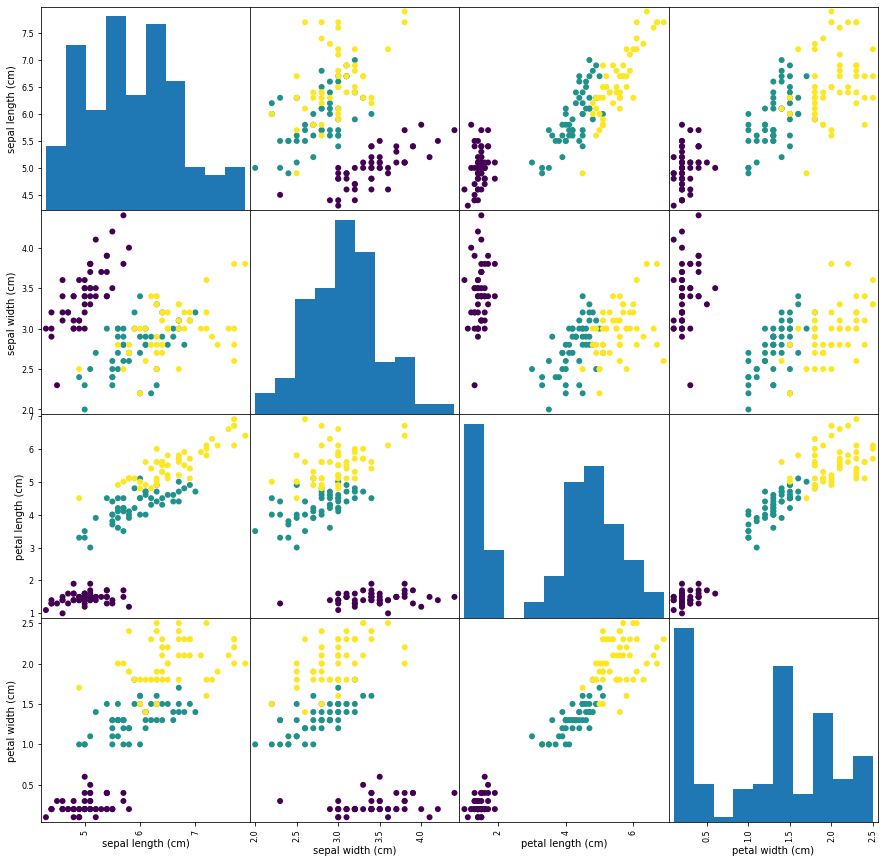

In [ ]:
# seaborn 기능을 이용하려면 DataFrame으로 변환해야 가능함.
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15),alpha=1, marker='o')
plt.show()

In [ ]:
# knn 모델 생성
knn_clf = KNeighborsClassifier()

In [ ]:
# 모델 훈련(fit)
knn_clf.fit(X,y)

KNeighborsClassifier()

In [ ]:
# 훈련 셋에서 예측값 계산
train_pred = knn_clf.predict(X)
train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 예측값 실젯값 비교 - 평가
# np.mean(y==train_pred)
knn_clf.score(X,y)

0.9666666666666667

In [ ]:
# 하이퍼파라미터 튜닝
k = []  # 각각의 k값에서 계산한 정확도를 저장할 리스트  # 각각의 k값에서 계산한 정확도를 저장할 리스트
for i in range(1, 151): 
    knn = KNeighborsClassifier(n_neighbors=i) # 머신 러닝 모델 생성
    knn.fit(X,y) # 모델 훈련(fit)
    train_pred = knn.predict(X) # 훈련 셋에서 예측값 계산
    score = knn.score(X,y) # 훈련 셋에서의 정확도
    k.append(score)
print(k)

[1.0, 0.98, 0.96, 0.96, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9733333333333334, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9666666666666667, 0.9733333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.9533333333333334, 0.96, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9466666666666667, 0.96, 0.94, 0.9533333333333334, 0.9333333333333333, 0.9466666666666667, 0.94, 0.94, 0.9333333333333333, 0.94, 0.94, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9266666666666666, 0.9333333333333333, 0.92, 0.9266666666666666, 0.9133333333333333, 0.9266666666666666, 0.9, 0.9133333333333333, 0.9066666666666666, 0.9066666666666666, 0

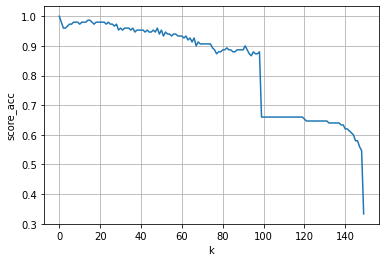

In [ ]:
plt.plot(k)
plt.grid()
plt.xlabel('k')
plt.ylabel('score_acc')
plt.show()